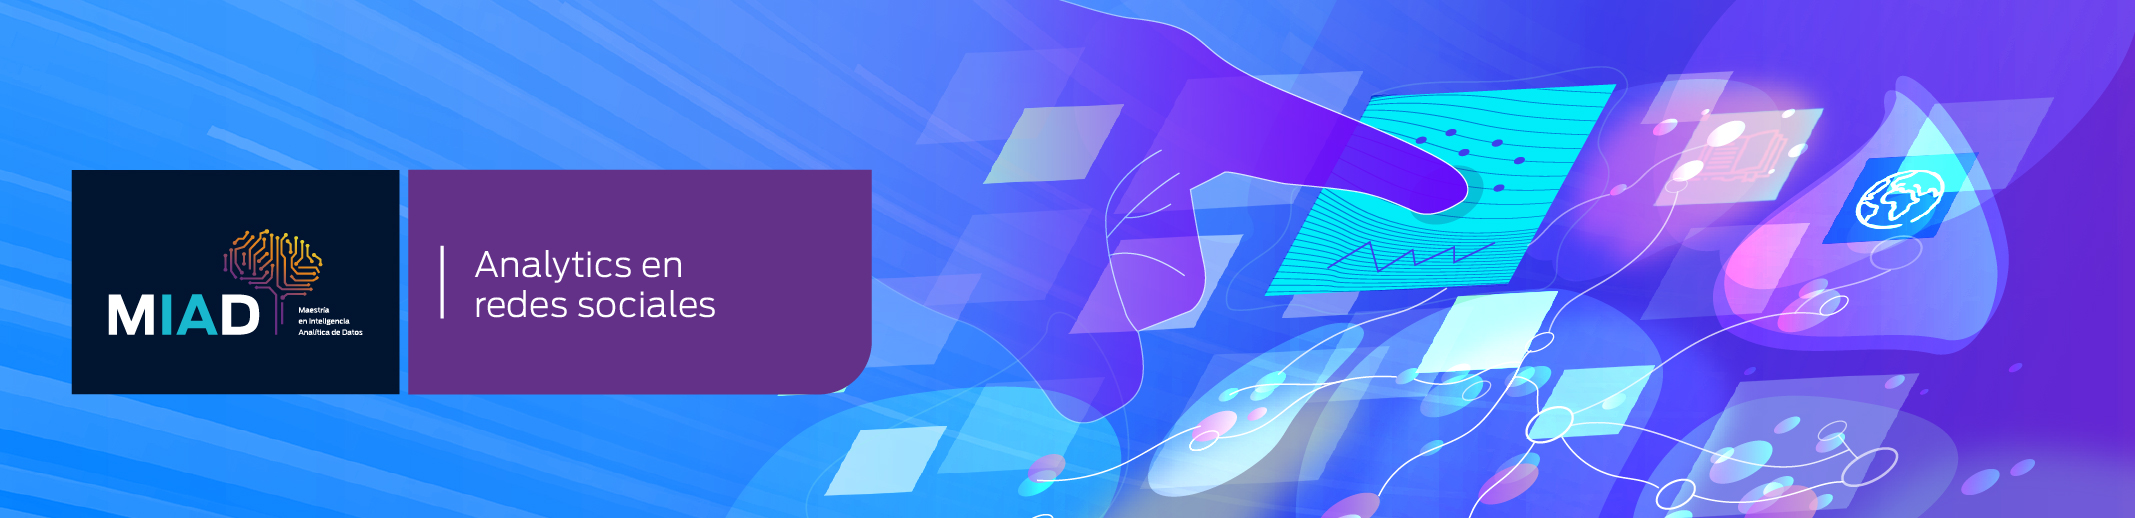

# Tutorial: Muestreo de datos en Python

Este tutorial está basado en las siguientes lecturas:
1. *Sample Size Determination and Power* de Thomas P. Ryan (2013).
2. *Sampling Methods in Research Methodology; How to Choose a Sampling Technique for Research* de Hamed Tahersdoost (2016).
3. *Network Sampling: From Snowball and Multiplicity to Respondent-Driven Sampling* de Dougal Heckathorn y Christopher Cameron (2017).
4. *Sampling size and Simple Size Calculation* de Nick Fox, Amanda Hunn y Nigle Mathers (2007).
5. *Sample size calculations: basic principles and common pitfalls* de Marlies Noordzij, Gionanni Tripepi, Friedo Dekker, Carmine Zoccali, Michael Tanck y Kitty Jager (2010).

El propósito de este tutorial es repasar unos conceptos básicos de estadística clásica como insumo para introducir las metodologías de recolección de datos, determinación del tamaño de muestra, y el poder muestral. También, exploraremos metodologías de recolección de datos en redes.

#### Expectativas del tutorial
Al final de este tutorial esperamos que ustedes puedan:

- Determinar el tamaño de una muestra a partir de un análisis estadístico.
- Realizar un muestreo estadístico sobre una población y obtener una muestra aceptable.
- Realizar un muestro en redes sobre una población y obtener una muestra aceptable.

#### Tabla de Contenido

+ [Algunos conceptos básicos para realizar muestreo](#basico)
+ [Un marco conceptual para realizar un muestreo y la selección de individuos](#conceptual)
+ [Metodologías de selección de la muestra](#seleccion)
    + [Muestreo por probabilidad](#probabilidad)
    + [Muestreo no-probabilístico](#noprob)
+ [¿Cómo determinar el tamaño adecuado de la muestra?](#tamano)
+ [Metodologías de muestreo en redes](#redes)
    + [Metodologías derivadas del muestreo por bola de nieve](#nieve)
    + [Muestreo impulsado por el encuestado (RDS)](#rds)

<a id = "basico"></a>
### Algunos conceptos básicos para realizar muestreo

* **Nivel de precisión**

Hace referencia al rango en que el valor real de la población será estimada. Por ejemplo, si en una muestra el 50% de los individuos presenta una característica, entonces se puede afirmar que con un nivel de precisión (p.ej: 5%) la población real presenta dicha característica (es decir entre el 47.5%-52.5%).

* **Nivel de confianza (alpha)**

Nivel de riesgo relacionado con el porcentaje de individuos que logran capturar el valor real de la población dado un nivel de precisión. Por ejemplo, si se habla de un nivel de confianza del 95%, esto significa (bajo los supuestos de normalidad) que 95 de 100 muestras estáran en los valores reales de la población.

* **Margen de error o grado de variabilidad**

Grado de error que se tiene con respecto a la población original. En poblaciones más homogéneas el margen de error puede ser menor, dado que hay menor variabilidad, por lo que no es necesario tener muestras tan grandes. Cuando las poblaciones son más heterogéneas, el margen de error debe ser mayor para capturar la mayor variabilidad de la población.

En la siguiente tabla 

**Componentes a tener en cuenta cuando tenemos muestreo comparativo entre grupos**
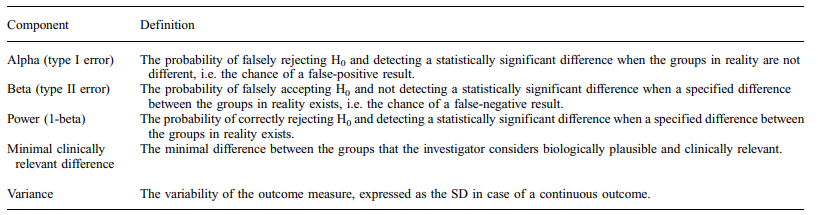
<h4><center>Fuente: Noordzij et.al (2010)</center></h4>

<a id = "conceptual"></a>
### Un marco conceptual para realizar un muestreo y la selección de individuos

##### Pasos a tener en cuenta a la hora de realizar un muestreo
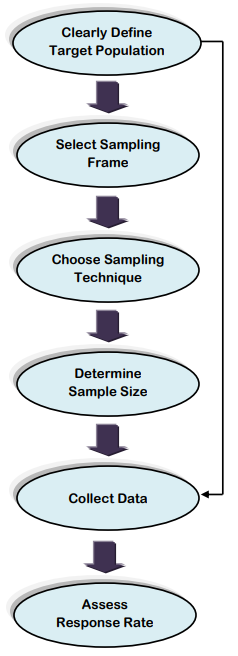
Taherdoost (2016)

1. **Definir la población objetivo**

El primer paso consta de delimitar la población objetivo para poder definir el número total de individuos que lo componen (en los casos donde sea posible).

2. **Elegir el marco de referencia para el muestreo**

El segundo paso consta de definir cuáles van a ser las mediciones que pueden ser de interés para capturar en los individuos que van a ser seleccionados, o las características por las cuales se va a construir la muestra (p.ej: estratificación, clusters).

3. **Escoger la técnica de muestro**

De acuerdo a la pregunta de investigación, elegir alguna de las metodologías de muestreo (probabilísticas o no-probabilísticas).

4. **Determinar el tamaño de la muestra**

El cuarto paso parte de determinar el número de observaciones que conformarán la muestra a partir del marco de referencia definido.

5. **Recolectar la data**

El quinto paso parte por implementar la estrategia completa de muestreo recolectando los datos en la población seleccionada.

6. **Determinar la tasa de respuesta**

El último paso incluye el cálculo de la tasa de respuesta. La tasa de respuesta se calcula diviendo el número de encuestas realizadas sobre el total de encuestas proyectadas. Esta tasa me permite entender el porcentaje de encuestas que efectivamente se lograron realizar de la población completa.

<a id = "seleccion"></a>
### Metodologías de selección de la muestra

Dentro de las diferentes metodologías para realizar muestreo se podría agrupar las más frecuentes en dos: muestreo probabilístico y no-probabilístico.

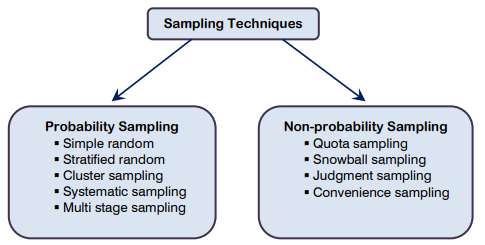
<h4><center>Fuente: Taherdoost (2016)</center></h4>

<a id = "probabilidad"></a>
#### Muestreo probabilístico

* **Muestreo aleatorio**

Cada observación tiene la misma probabilidad de ser seleccionado. Esto incluye el hecho de que pueden haber selecciones repetidas en la muestra. Tiene la desventaja de que es necesario conocer a toda la población y genera errores estandar altos en las estimaciones.

* **Muestreo sistemático**

Las observaciones se escogen de acuerdo a un patrón de selección iniciando de manera aleatoria. Por ejemplo, si se elige sobre una muestra seleccionar cada 5 observaciones.

* **Muestreo estratificado**

Existen divisiones inherentes en la población que justifican hacer una muestreo por grupos. Para cada grupo se realiza un muestreo aleatorio de igual tamaño. El propósito de realizar este tipo de muestreo es asegurar la representatividad por grupo.

* **Muestreo por clusters**

La población está fragmentada en grupos o clusters (p.ej: geografía), por lo que la selección se debe hacer teniendo en cuenta dicha fragmentación. Para cada uno de los clusters se realiza un muestreo aleatorio. Esto permite capturar la representatividad de cada cluster y los datos se agrupan para tener una muestra completa.


Hagamos uso de la siguiente base para entender estos conceptos, la siguiente base especifica para cada *Referencia* qué *Tipo* de referencia es.

In [2]:
# Importar pandas
import pandas as pd

In [3]:
# Utilizar base de datos para ilustrar los primeros tres muestreos descritos anteriormente
dic = {
    "Referencia": ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T"],
    "Tipo": pd.Categorical([1,2,1,2,3,2,3,3,3,2,2,1,1,2,3,1,2,1,2,3])
}
base = pd.DataFrame(dic)

In [4]:
# ¿Cómo se ve la base?
base.head()

,Referencia,Tipo
0,A,1
1,B,2
2,C,1
3,D,2
4,E,3


In [5]:
# ¿Cuántas referencias se tienen por cada tipo?
base.groupby("Tipo").count()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_39024\1575571209.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  base.groupby("Tipo").count()


,Referencia
Tipo,
1,6
2,8
3,6


Para aplicar un ***muestreo aleatorio*** podemos hacer uso de la función ``.sample()`` de Pandas, la cual recibe el tamaño de la muestra aletoria que queremos extraer.

En el siguiente ejemplo extraemos de la *base* una muestra aletoria de *8*.

In [7]:
# Aplicar el muestreo aleatorio
# De las 20 observaciones se va a seleccionar una submuestra de 8 observaciones
muestra_aleatoria = base.sample(8)
muestra_aleatoria.head()

,Referencia,Tipo
3,D,2
5,F,2
0,A,1
8,I,3
13,N,2


Para aplicar el ***muestreo sistemático*** necesitamos hacer uso de la librería ***ramdom*** para hacer uso de la función ``random.randint()`` que recibe la posición inicial y la final de la muestra.

In [8]:
# Importar random
import random

Para este tipo de muestreo tomamos desde la posición *0* de la base hasta la última posición *len(base)*, para escojer una posición aletoria inicial.

In [15]:
# Escoger una posición aletoria inicial
pos = random.randint(0,len(base))
pos

9

Ahora, tomamos cada *x* observaciones a partir de la posición aleatoria que generamos anteriormente. Para este ejemplo tomamos *3* posiciones:

In [16]:
# Escoger cada 3 observaciones a partir de una posición aleatoria
muestreo_sistematico = base[pos:len(base):3]
muestreo_sistematico.head()

,Referencia,Tipo
9,J,2
12,M,1
15,P,1
18,S,2


Para aplicar el ***muestro estratificado*** podemos selecionar una varible de interés de la base, por ejemplo el *tipo*, para escoger entre las observaciones deseadas un muestreo aletorio. <br>
En este ejemplo escojemos las observaciones de tipo *1* y tomamos una muestra de tamaño *3*.

In [17]:
# Aplicar el muestreo estratificado de acuerdo al tipo
# Seleccionar 3 muestras para cada tipo
muestra_tipo1 = base[base["Tipo"]==1].sample(3)
muestra_tipo1.head()

,Referencia,Tipo
11,L,1
17,R,1
15,P,1


Ahora escogemos las observaciones de tipo *2* y tomamos una muestra de tamaño *3*.

In [18]:
muestra_tipo2 = base[base["Tipo"]==2].sample(3)
muestra_tipo2.head()

,Referencia,Tipo
9,J,2
13,N,2
10,K,2


Por último, escogemos las observaciones de tipo *3* y tomamos una muestra de tamaño *3*.

In [19]:
muestra_tipo3 = base[base["Tipo"]==3].sample(3)
muestra_tipo3.head()

,Referencia,Tipo
14,O,3
4,E,3
19,T,3


<a id = "noprob"></a>
#### Muestreo no-probabilístico

* **Muestreo por cuota**

La muestra se crea con el fin de preservar determinadas características que la población total tiene. De esta manera la muestra elegida tiene propiedades similares a la población total.

* **Muestreo por bola de nieve**

Este muestreo parte de unas observaciones semillas desde las cuales se empieza a crecer sistemáticamente el tamaño de la muestra. Es común en poblaciones pequeñas de difícil acceso. Es muy utilizada para recolectar redes sociales.

* **Muestreo por conveniencia**

Este muestreo selecciona a individuos de fácil acceso y disposición para ser parte de la muestra. Sucede con frecuencia en estudios con personas que ya han hecho parte de estudios diferentes. Por ejemplo, de una persona se pueden seleccionar sus familiares o amigos para hacer parte de la muestra.

* **Muestreo por propósito**

Este muestreo busca seleccionar individuos de los que se necesita información particular que no puede ser obtenida de otras formas.

##### Ventajas y desventajas de los métodos de muestreo:
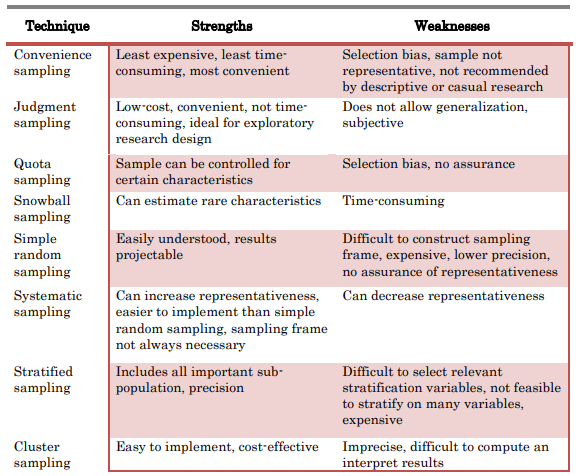
<h4><center>Fuente: Taherdoost (2016)</center></h4>

<a id = "tamano"></a>
### ¿Cómo determinar el tamaño adecuado de la muestra?

En la literatura hay diferentes aproximaciones para el calculo del poder muestral y el tamaño de la muestra. Estos van desde la aproximación de la estadística clásica (frecuentisita), la bayesiana a metodologías más sofisticadas para esto. 

##### ¿Cómo determinar la muestra cuando no tengo conocimiento de la población completa?

La primera aproximación, en caso de no tener información sobre la población salvo su **tamaño**, es usar la **fórmula de Slovin**. Esta fórmula es la aproximación más simplista y menos rigurosa, pero caputra el concepto de mayorías:

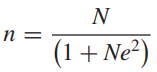

donde ``N`` corresponde al tamaño de la población y e corresponde al tamaño deseado del margen de error.

#### Ejemplo 1
Imagine que tenemos una población de 20.000 personas, en donde el 45% son hombres y el 55% son mujeres. ¿Cuál debería ser el tamaño de la muestra si se quiere tener un 5% de margen de error?

Antes de poder resolver esta pregunta, es importante importar la librería *math*, que permite aplicar aproximaciones a los números.

In [20]:
# Importar math
import math

Primero definamos las variables de la población y el margen de error:

In [21]:
N = 20000 # población total
e = 0.05 # margen de error deseado

Ahora definamos el tamaño de la muestra:

In [22]:
# Tamaño de la muestra
n = math.floor(N/(1+N*e**2))
n

392

Supongamos que ahora tenemos información diferente. Seguimos sin conocer o tener información sobre la población completa, pero al menos ahora sabemos la distribución de esta población a partir de una característica (p.ej: sexo). Cuando lo que tenemos son **proporciones**, podemos utilizar la fórmula propuesta por Cochran (1963):

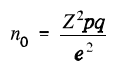
donde ``Z`` corresponde a una distribución normal estandar relacionada al nivel de confianza (alpha), ``p`` corresponde a la proporción estimada con respecto a la característica, ``q`` es igual a 1-p y ``e`` es el margen de error deseado

#### Ejemplo 2
Imagine que tenemos una población en donde el 45% son hombres y el 55% son mujeres. ¿Cuál debería ser el tamaño  de la muestra si se quiere tener un 5% de margen de error y se tiene un nivel de confianza del 10%?

Para este tipo de problemas es de gran utilidad instalar la librería *scipy.stats*, en especial el paquete *norm* para importar las funciones de distribución normal.

In [23]:
# Importar scipy.stats
from scipy.stats import norm

Definamos las caraterísticas de la población:

In [24]:
# Definir características
p = 0.45 # porcentaje de hombre
q = 1-p # porcentaje de mujeres
e = 0.05 # margen de error
alpha = 0.1 # nivel de confianza

Ahora definamos el tamaño de la muestra:

In [25]:
Z = norm.ppf(alpha) # distribución normal
n = ((Z**2)*p*q)/(e**2) # tamaño de la muestra
math.floor(n) # redondear el número para poder tener un número entero

162

---------------------------------------------------------------------------------------------------------------------------

¿Qué pasa cuando descubrimos que la población es mucho más pequeña de lo que creíamos?
Cuando encontramos que nuestra estimación puede llegar a ser muy grande si encontramos que la población es menor a la que estimabamos, entonces debemos corregir nuestros cálculos. Para esto podemos usar la fórmula de correción poblacional:

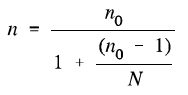
donde $n_0$ corresponde a nuestra estimación inicial y N al tamaño de la población.

#### Ejemplo 3
Imagine que tenemos una población en donde el 45% son hombres y el 55% son mujeres. Sabemos que el tamaño ideal de la muestra, de acuerdo a las proporciones, debería ser 162. Si nuestra población está compuesta de 900 personas, ¿la estimación debería cambiar?

Definamos las características de la población:

In [26]:
n0 = 162 # tamaño ideal
N = 900 # tamaño de la población

Ahora definamos el tamaño de la muestra:

In [27]:
n = n0/(1+((n0-1)/N)) # tamaño de la estimación
math.floor(n) # redondear

137

---------------------------------------------------------------------------------------------------------------------------
Pensemos que ahora lo que tenemos son la información de la **media** y la **desviación** de la población con respecto a una característica (p.ej: peso). En este caso podemos utilizar una variación de la fórmula de las proporciones:

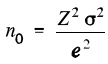
donde ``Z`` corresponde a una distribución normal estandar relacionada al nivel de confianza (alpha), ``sigma`` corresponde a la desviación estandar y ``e`` es el margen de error deseado.

#### Ejemplo 4
Imagine que tenemos una población en donde sabemos que la media del peso es 78 kg con una desviación estandar de 1.85 kg. ¿Cuál debería ser el tamaño de la muestra si se quiere tener un 5% de margen de error y se tiene un nivel de confianza del 10%?

Definamos las características de la muestra:

In [28]:
sigma = 1.85 # desviación estandar
e = 0.05 # margen de error
alpha = 0.1 # nivel de confinza

Ahora definamos el tamaño de la muestra:

In [29]:
Z = norm.ppf(alpha) # distribución normal
n = ((Z**2)*sigma**2)/(e**2) # tamaño de la muestra
math.floor(n) # redondear

2248

##### ¿Qué pasa cuando tenemos información completa de nuestra población?
Dado que ahora si conocemos el tamaño real de la población, podemos acotar nuestras estimaciones a estos valores poblacionales. Todo lo que vimos antes aplica de igual manera cuando queremos evaluar proporciones o tenemos información de la media y desviación estandar de una característica. Por lo tanto, vamos a tener una combinación entre estas fórmulas y la fórmula de Slovin así:

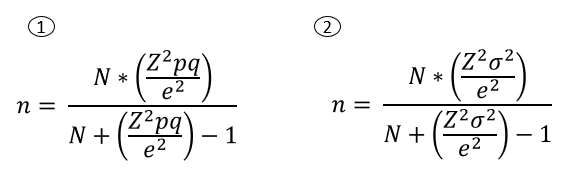
* La fórmula 1 es la modificación con proporciones.
* La fórumla 2 es la modificación con información de media y desviación estandar.

#### Ejemplo
Vamos a analizar otro pueblo, el cual tiene una población de 125000 habitantes. De estos, el 35% tiene estudios superiores y el resto solamente estudios básicos. ¿Cuál debe ser el tamaño a capturar para cada uno de los grupos si se tiene un margen de error del 5% y un nivel de confianza del 3%?

Definamos la población y sus características:

In [30]:
# Tamaño de la población
N = 125000
# Probabilidad de tener estudios superiores
p = 0.35
# Probabilidad de tener estudios básicos
q = 1-p
# Margen de error
e = 0.05
# Nivel de confianza
alpha = 0.03

Ahora definamos el tamaño de la muestra

In [33]:
# Distribución estandar
Z = norm.ppf(alpha) 
# Tamaño de la muestra
n = (N*(((Z**2)*p*q)/(e**2)))/(N+(((Z**2)*p*q)/(e**2))-1)
# Redondear
math.floor(n)

321

*Resultado esperado:* ``321``

<a id = "redes"></a>
### Metodologías de muestreo en redes

<a id = "nieve"></a>
#### Metodologías derivadas del muestreo por bola de nieve

1. **Muestreo simple por bola de nieve**

Se seleccionan nodos semilla de una población para iniciar las diferentes olas de captura de nuevos nodos. A cada nodo semilla (nodos negros) se les solicita que nominen a otros nodos de acuerdo a una pregunta que se quiera responder.
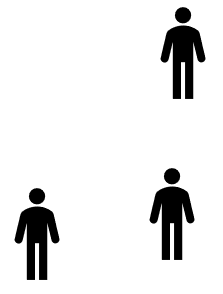
Creamos las conexiones de los nodos semillas (nodos negros) con los que nominaron (nodos naranja). Este proceso es lo que se llama una ola de recolección de datos.
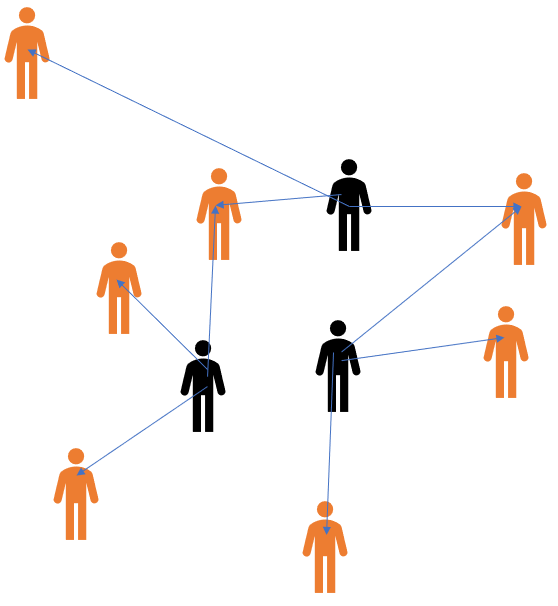
Después, se contacta a cada nodo recopilado en la primera ola (nodos naranja) y se les pide que nominen a otros nodos (nodos verdes). Nuevamente se crean las conexiones entre los nodos. Puede suceder que los nodos de la primera ola nominen a otros nodos ya recopilados. Sin embargo, eso no es un problema, es parte del proceso de capturar la red real.
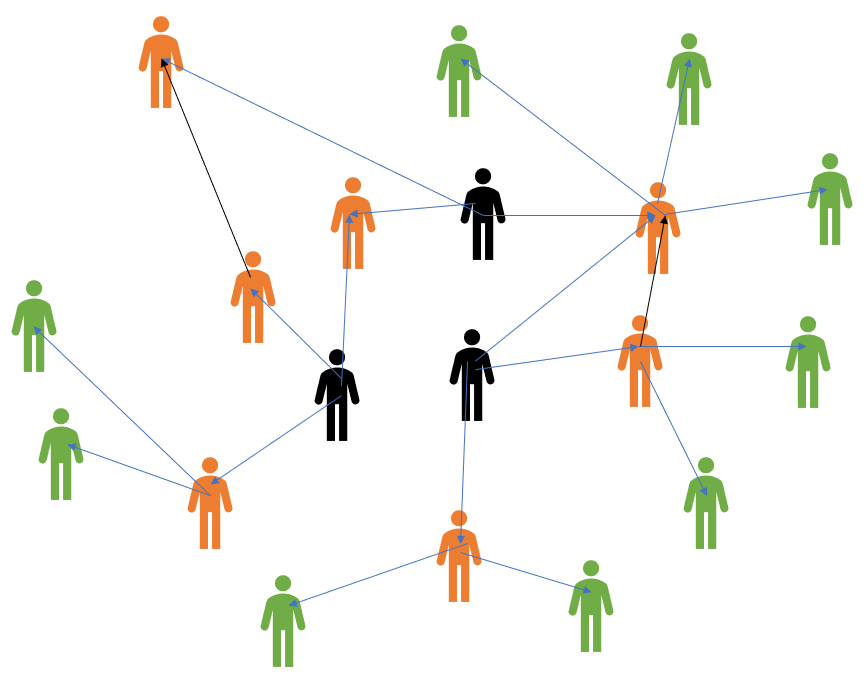

2. **Muestreo por multiplicidad**

Fue desarrollada por Sirken en los años 60s, donde se probaba la metodología realizando encuestas telefónicas y encontraban que muchas veces un mismo hogar tenía diferentes números. A raíz de esto y de estudios realizados por Laumann en los años 80s, se llegó a la conclusión que para capturar una red mucho más cohesionada se debe ir evaluando en cada ola a los individuos mejor conectados, para ir creciendo la red usandolos. La red eventualmente capturaría el efecto de los individuos muy bien conectados y haría crecer la red de manera más rápida que eligiendo de manera aleatoria a los nodos en cada ola. Para esto, Rothbart et.al propuso utilizar un peso asociado a la multiplicidad del individuo así:
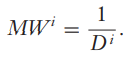
donde ``MW`` es el peso asociado a la multiplicdad y ``D`` es el grado del individuo.

***¿Cuál es la idea detrás de esto? -> Individuos con más nominaciones permiten crecer la red más rápido y en un mayor número de nodos y conexiones***.

#### Ejemplo de muestreo por bola de nieve

Primero carguemos los datos de una red simulada contenida en un diccionario ``dic`` en un Data Frame ``base``:

In [34]:
# Cargar los datos de red
dic = {
    "id" : ["A","B","C","D","E","F","G","H","I","J","K","L","M","N"],
    "conexiones" : [["B","M"],["F","A","C","N"],["A","K","L"],["A","B","G"],["D","J"],["A","G","L"],["F","C","H","K"],
                  ["F","A","B","L"],["J","K","A"],["A","B","E","I"],["M","N"],["E"],["I","F"],["G","A","C","E"]]
}

In [35]:
# Cargar datos en Data Frame
base = pd.DataFrame(dic)
base.head()

,id,conexiones
0,A,"[B, M]"
1,B,"[F, A, C, N]"
2,C,"[A, K, L]"
3,D,"[A, B, G]"
4,E,"[D, J]"


1) Selecionemos de forma aleatoria *2* nodos que harán de nodos semilla:

In [36]:
# Selecciar aleatoriamente 2 semillas para la primera ola
ola1 = base.sample(2)

Veamos cuáles son los nodos:

In [37]:
ola1

,id,conexiones
9,J,"[A, B, E, I]"
10,K,"[M, N]"


2) Generemos los arcos de estos nodos semilla:

In [38]:
# Crear los arcos para estos nuevos individuos
sources = [] # lista de origenes
target = [] # lista de destinos

# Recorrer los nodos semilla
for i in ola1.index:
    # Guardar las conexiones del nodo
    conexiones = ola1["conexiones"][i]
    # Recorrer las conexiones del nodo
    for j in range(len(conexiones)):
        # Agregar el origen
        sources.append(ola1["id"][i])
        # Agregar el destino
        target.append(conexiones[j])

Validemos que ``target`` y ``source`` estén correctos:

In [39]:
target

['A', 'B', 'E', 'I', 'M', 'N']

In [40]:
sources

['J', 'J', 'J', 'J', 'K', 'K']

3) Capturemos los nuevos nodos de la primera ola, que surgen de ``target``, y enocontremos sus conexiones:

In [41]:
# Nuevos individuos capturados en la ola 1 y sus conexiones
ola2 = base[base["id"].isin(target)]
ola2.head()

,id,conexiones
0,A,"[B, M]"
1,B,"[F, A, C, N]"
4,E,"[D, J]"
8,I,"[J, K, A]"
12,M,"[I, F]"


4) Agreguemos los arcos de los nuevos nodos capturados:

In [42]:
# Agregar los arcos con las personas capturadas en la ola para recrear la ola 2
# Recorrer los nodos de la ola 2
for i in ola2.index:
    # Guardar las conexiones
    conexiones = ola2["conexiones"][i]
    # Recorrer las conexiones
    for j in range(len(conexiones)):
        # Agregar los origenes
        sources.append(ola2["id"][i])
        # Agregar a los destinos
        target.append(conexiones[j])

Validemos que ``target`` y ``source`` estén correctos:

In [43]:
sources

['J',
 'J',
 'J',
 'J',
 'K',
 'K',
 'A',
 'A',
 'B',
 'B',
 'B',
 'B',
 'E',
 'E',
 'I',
 'I',
 'I',
 'M',
 'M',
 'N',
 'N',
 'N',
 'N']

In [44]:
target

['A',
 'B',
 'E',
 'I',
 'M',
 'N',
 'B',
 'M',
 'F',
 'A',
 'C',
 'N',
 'D',
 'J',
 'J',
 'K',
 'A',
 'I',
 'F',
 'G',
 'A',
 'C',
 'E']

***Nota***: El algoritmo podría continuar pero para este ejercicio solo realizamos dos olas. Un metodo para poder definir cuando detener la generación de olas es cuando los nuevos nodos agregados en cada una de ellas sean nulos o muy bajos.

5) Creamos un archivo con los nodos y sus conexiones que logramos capturar.

Para esto es de gran utilidad usar la función ``unique()`` de la librería *numpy*, para tener los nodos capturados sin duplicados.

In [45]:
# Importar Numpy
import numpy as np

In [46]:
# Crear el archivo de nodos

# Crear una lista con los nodos capturados
completos = np.unique(sources+target)

# Guardar la anterior lista en un Data Frame
nodos=pd.DataFrame(completos, columns=['nodo'])
nodos

,nodo
0,A
1,B
2,C
3,D
4,E
5,F
6,G
7,I
8,J
9,K


Dado el formato en el que capturamos los datos para generar las tuplas de los arcos, podemos usar la función ``zip(sources, target)``, la cuál, como su nombre lo indica, trabaja como una cremallera (*por su nombre en inglés zipper*) uniendo en tuplas las dos listas *source* y *target*. Una vez unidas las dos listas, usamos la función ``list()`` para generar la lista de tuplas.

In [47]:
# Crear el archivo de arcos

# Generar la lista de tuplas
tuplas=list(zip(sources, target))

# Crear un Data Frame a partir de las tuplas
arcos = pd.DataFrame( tuplas, columns =['Source', 'Target'])
arcos

,Source,Target
0,J,A
1,J,B
2,J,E
3,J,I
4,K,M
5,K,N
6,A,B
7,A,M
8,B,F
9,B,A


6) Creemos y visualicemos la red que capturamos:

In [48]:
# Importar NetworkX
import networkx as nx

In [49]:
# Crear la red a partir de estos datos capturados

# Definir la red como dirigida
G = nx.DiGraph()

# Agregar los nodos
G.add_nodes_from(nodos.nodo)

# Agregar los arcos
for j in arcos.index:
    n1 = arcos["Source"][j]
    n2 = arcos["Target"][j]
    G.add_edge(n1,n2)

Veamos cuantos nodos y arcos capturamos:

In [50]:
# Verificar el número de arcos y nodos
print('Capturamos',G.number_of_nodes(), 'nodos')
print('Capturamos',G.number_of_edges(), 'edges')

Capturamos 12 nodos
Capturamos 23 edges


Por último grafiquemos la red que se capturó:

In [51]:
# Impotar Matplotlib
import matplotlib.pyplot as plt

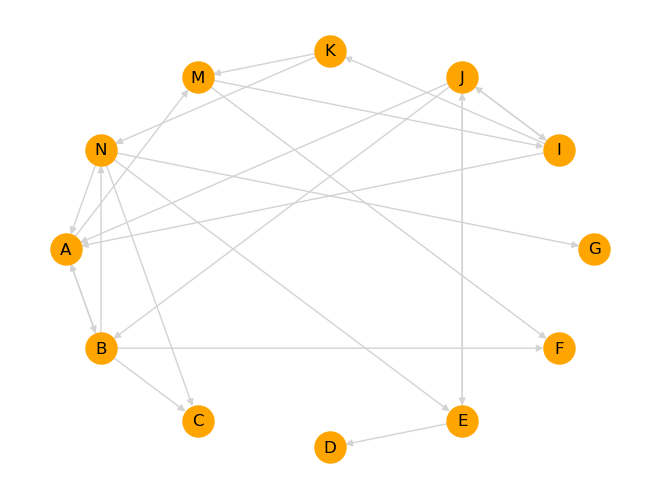

In [52]:
# Graficar la red
nx.draw_shell(G,node_size = 500,node_color = "orange",edge_color="lightgray",with_labels=True)